# Data Science Project
## Visualising HPG and AirREGI  data from Japanese Restaurants
### Fayz Siddiqui

This data was supplied by the University of Edinburgh. As part of a coursework, we were assigned to process and visualise data about Japanese restaurants from two different sources: 

- Hot Pepper Gourmet (HPG)
- AirREGI (Air)

Below are the visualisations produced for the project.

In [1]:
# Importing relevant python packages
import os#
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings 
warnings.filterwarnings('ignore')
np.random.seed(42)

print("All packages imported!")

plt.style.use('bmh')

All packages imported!


## |------------------------------------------------------Task 2------------------------------------------------------|

This bar chart compares the number of vsitors recordered for each dataset, based on the restaurants they both have information on.

In [2]:
# Reading csv files into dataframes

hpg_reserve = pd.read_csv(os.path.join(os.getcwd(),'Data', 'hpg_reserve.csv.gz'))
air_reserve = pd.read_csv(os.path.join(os.getcwd(),'Data', 'air_reserve.csv'))
store_id = pd.read_csv(os.path.join(os.getcwd(),'Data','store_id_relation.csv'))

# Merging the air and hpg reservations data to the store id to match each restaurant to their appropriate ID for each dataset
air_reserve_merged = pd.merge(air_reserve, store_id, on='air_store_id')
hpg_reserve_merged = pd.merge(hpg_reserve, store_id, on='hpg_store_id')

# Obtaining 2016 data from merged databases 
# and then finding the total number of visitors for each dataset

air_reserve_2016 = air_reserve_merged[air_reserve_merged["visit_datetime"].str.contains('2016-')]
air_visitors = air_reserve_2016["reserve_visitors"].sum()

hpg_reserve_2016 = hpg_reserve_merged[hpg_reserve_merged['visit_datetime'].str.contains('2016-')]
hpg_visitors = hpg_reserve_2016["reserve_visitors"].sum()

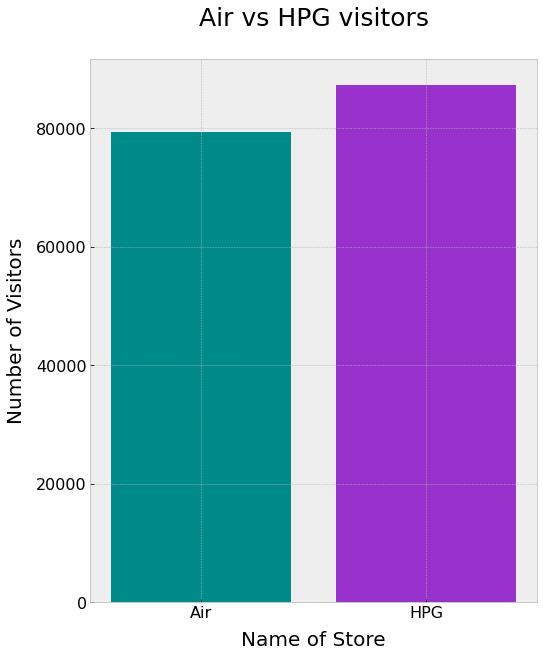

In [3]:
# plotting how many visits are generated from the air and hpg datasets

plt.style.use('bmh')
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,10))

x_axis = ["Air","HPG"]
height = [air_visitors, hpg_visitors]

axes.bar(x_axis, height, tick_label = x_axis, width = .8, color = ['darkcyan', 'darkorchid'], align = 'center') 
axes.set_title('Air vs HPG visitors', fontsize = 25,y = 1.05)
axes.set_xlabel("Name of Store", fontsize = 20 ,labelpad = 10)
axes.set_ylabel("Number of Visitors", fontsize = 20,labelpad = 10)

axes.tick_params(axis='x', labelsize = 16)
axes.tick_params(axis='y', labelsize = 16)

plt.show()

## |------------------------------------------------------Task 3------------------------------------------------------|

This scatterplot maps the location of each restauarant categorised by the 4 types in the legend. The plot inclues random noise in the data to avoid overlap of the restaurants. The air dataset was used here.

In [1]:
# reading air_store_data csv file into a dataframe

air_store_data = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'air_store_info.csv'))


# Putting genres into arrays that specify their categories

bars_and_party_array = ["Bar/Cocktail", "Izakaya", "Dining bar", "Karaoke/Party"]
international_array = ["Italian/French", "Western food", "International cuisine","Creative cuisine", "Other"]
asian_array = ["Asian", 'Okonomiyaki/Monja/Teppanyaki', 'Japanese food', 'Yakiniku/Korean food']

# Defining function that will replace the values of air_genre_name with a single category. 
# The arrays above show the names that will be replaced 

def replace_for_df(dataframe, column_name, array, new_value):
    new_dataframe = dataframe
    for old_value in array:
        new_dataframe = new_dataframe.replace(to_replace ={column_name: old_value} , value = {column_name: new_value})
    
    return new_dataframe

# Using the above function to further categorise the restaurants into 'Bar/Party', 'International', 'Asian' and 'Cafe/Sweets'

edited_air_store_data = replace_for_df(air_store_data, 'air_genre_name', bars_and_party_array, 'Bar/Party')
edited_air_store_data = replace_for_df(edited_air_store_data, 'air_genre_name', international_array, 'International')
edited_air_store_data = replace_for_df(edited_air_store_data, 'air_genre_name', asian_array, 'Asian')

NameError: name 'pd' is not defined

In [2]:
# Setting a 

noisy_air_store_data = edited_air_store_data.copy()
noise = np.random.normal(0,0.1, len(noisy_air_store_data))
noisy_air_store_data['latitude'] = noisy_air_store_data['latitude'] + noise
noise = np.random.normal(0,0.1, len(noisy_air_store_data))
noisy_air_store_data['longitude']  = noisy_air_store_data['longitude'] + noise

fig = plt.figure(figsize = (15,15))
axes = fig.add_subplot(1,1,1)

collapsed_air_store_data = noisy_air_store_data.groupby("air_genre_name")
       
for category_name, category_data in collapsed_air_store_data:
    
    axes.plot(category_data["longitude"], category_data["latitude"], marker=".", linestyle="", label= category_name)
    
plt.legend()

NameError: name 'edited_air_store_data' is not defined

## |------------------------------------------------------Task 4------------------------------------------------------|

This plot shows the mean number of visitors to restaurants per week, over the course of a year and a half. The mean number is derived from the average across all restaurants, and the air dataset was used here

In [3]:
air_visit_data = pd.read_csv(os.path.join(os.getcwd(),'Data', 'air_visit_data.csv'))
air_visit_data['visit_date'] = pd.to_datetime(air_visit_data['visit_date'])
edited_dataframe = air_visit_data.set_index('visit_date')
resampled_by_day = edited_dataframe.resample(rule='D',  origin = '2016-01-13')
mean_data_per_day = resampled_by_day.mean()
resampled_by_week = mean_data_per_day.resample(rule='W',  origin = '2016-01-13')
mean_data_per_week = resampled_by_week.sum()
mean_data_per_week

NameError: name 'pd' is not defined

In [ ]:
fig = plt.figure(figsize = (20,8))
axes = fig.add_subplot(1,1,1)

axes.plot(mean_data_per_week.index, mean_data_per_week['visitors'],'b-',label = 'Linear  Data', linewidth=3)
axes.set_title('Mean number of visitors to restaurants per week', fontsize = 25,y = 1.1)
axes.set_xlabel("x-axis")
axes.set_ylabel("Values after applying function")

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)



## |------------------------------------------------------Task 5------------------------------------------------------|

This histogram below show shte number of visitors per day of the week. Below that is what I was able to infer from the graph.

In [4]:
# Importing relevant packages into notebook

import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mplt
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl
import warnings 
warnings.filterwarnings('ignore')
np.random.seed(42)

print("All packages imported!")

plt.style.use('bmh')
sns.set_style(style="whitegrid")
pd.options.display.float_format = '{:20,.2f}'.format

All packages imported!


In [5]:
# Reading hpg_reserve csv file into a dataframe

hpg_reserve = pd.read_csv(os.path.join(os.getcwd(), 'Data','hpg_reserve.csv.gz'))

#Converting the 'visit_datetime' field from a string object into a datetime field

hpg_reserve['visit_datetime'] = pd.to_datetime(hpg_reserve['visit_datetime'])

# Using a groupby dataframe object and finding the sum of visitors on each day using the sum method

visitors_each_day = hpg_reserve.groupby([hpg_reserve["visit_datetime"].dt.weekday])["reserve_visitors"].sum()


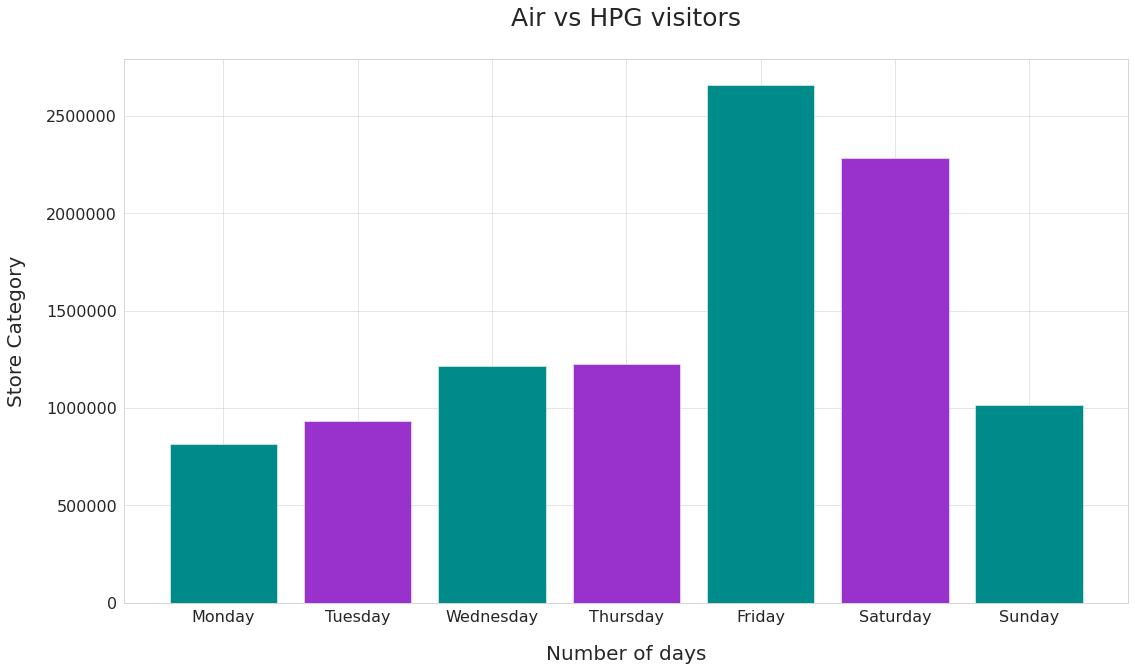

In [6]:
# Plotting the graph

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (18,10))
height = visitors_each_day

# Using the sum of visitors for each day across the full year and 
# each weekday in an array to plot the data

x_axis = ["Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
axes.bar(x_axis, height, tick_label = x_axis, width = .8, color = ['darkcyan', 'darkorchid'], align = 'center') 
axes.set_title('Air vs HPG visitors', fontsize = 25,y = 1.05)
axes.set_xlabel("Day", fontsize = 20)
axes.set_ylabel("Number of Visitors", fontsize = 20)

# Avoiding use of scientific notation for y axis
axes.yaxis.get_major_formatter().set_scientific(False)

# Editing spacing and fontsize of axis and ticklabels 
axes.set_xlabel('Number of days',fontsize = 20 ,labelpad = 20)
axes.set_ylabel('Store Category',fontsize = 20 ,labelpad = 20)
axes.tick_params(axis='x', labelsize = 16)
axes.tick_params(axis='y', labelsize = 16)
plt.show()

From the data you can see that Monday and Sunday are the least popular days for going to restaurants, bars, cafes etc. Fridays and Saturdays are more popular however, which is reasonable given that this is the weekend and people are not working at this time, meaning they have more time go out. Also, as the week progresses, people are going out more and more each day. This is likely becuase Monday is the busiest workday for most people, but as the week goes on, on average each person frees up more time, allowing them to go out. Sunday is an unpopular time to goo out as people are resting after a busy week on this day. 


## |------------------------------------------------------Task 6------------------------------------------------------|

In this visualisation, I have computed the time difference between reservation and visit time, and then categorised them into genres and compared the time differences between each category. Below that is an analysis of the results

In [7]:
# Reading air_reserve and air_store_info csv file into a datagrame

air_reserve = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'air_reserve.csv'))
air_store_info = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'air_store_info.csv'))

# Converting the reserve_datetime and visit_datetime fields 
# from string objects to datetime fields

air_reserve['reserve_datetime'] = pd.to_datetime(air_reserve['reserve_datetime'])
air_reserve['visit_datetime'] = pd.to_datetime(air_reserve['visit_datetime'])

# Calculating the difference in time between the reserve date and the visit date 
# for each row

time_difference = air_reserve['visit_datetime'] - air_reserve['reserve_datetime']

# Creating a new columnb for the time difference

air_reserve['time_difference'] = time_difference

# merging the air_reservation data with the store info data

air_info_merged = pd.merge(air_reserve, air_store_info, on='air_store_id')

Text(0.5, 1.0, 'Number of days reserved in advance for each category')

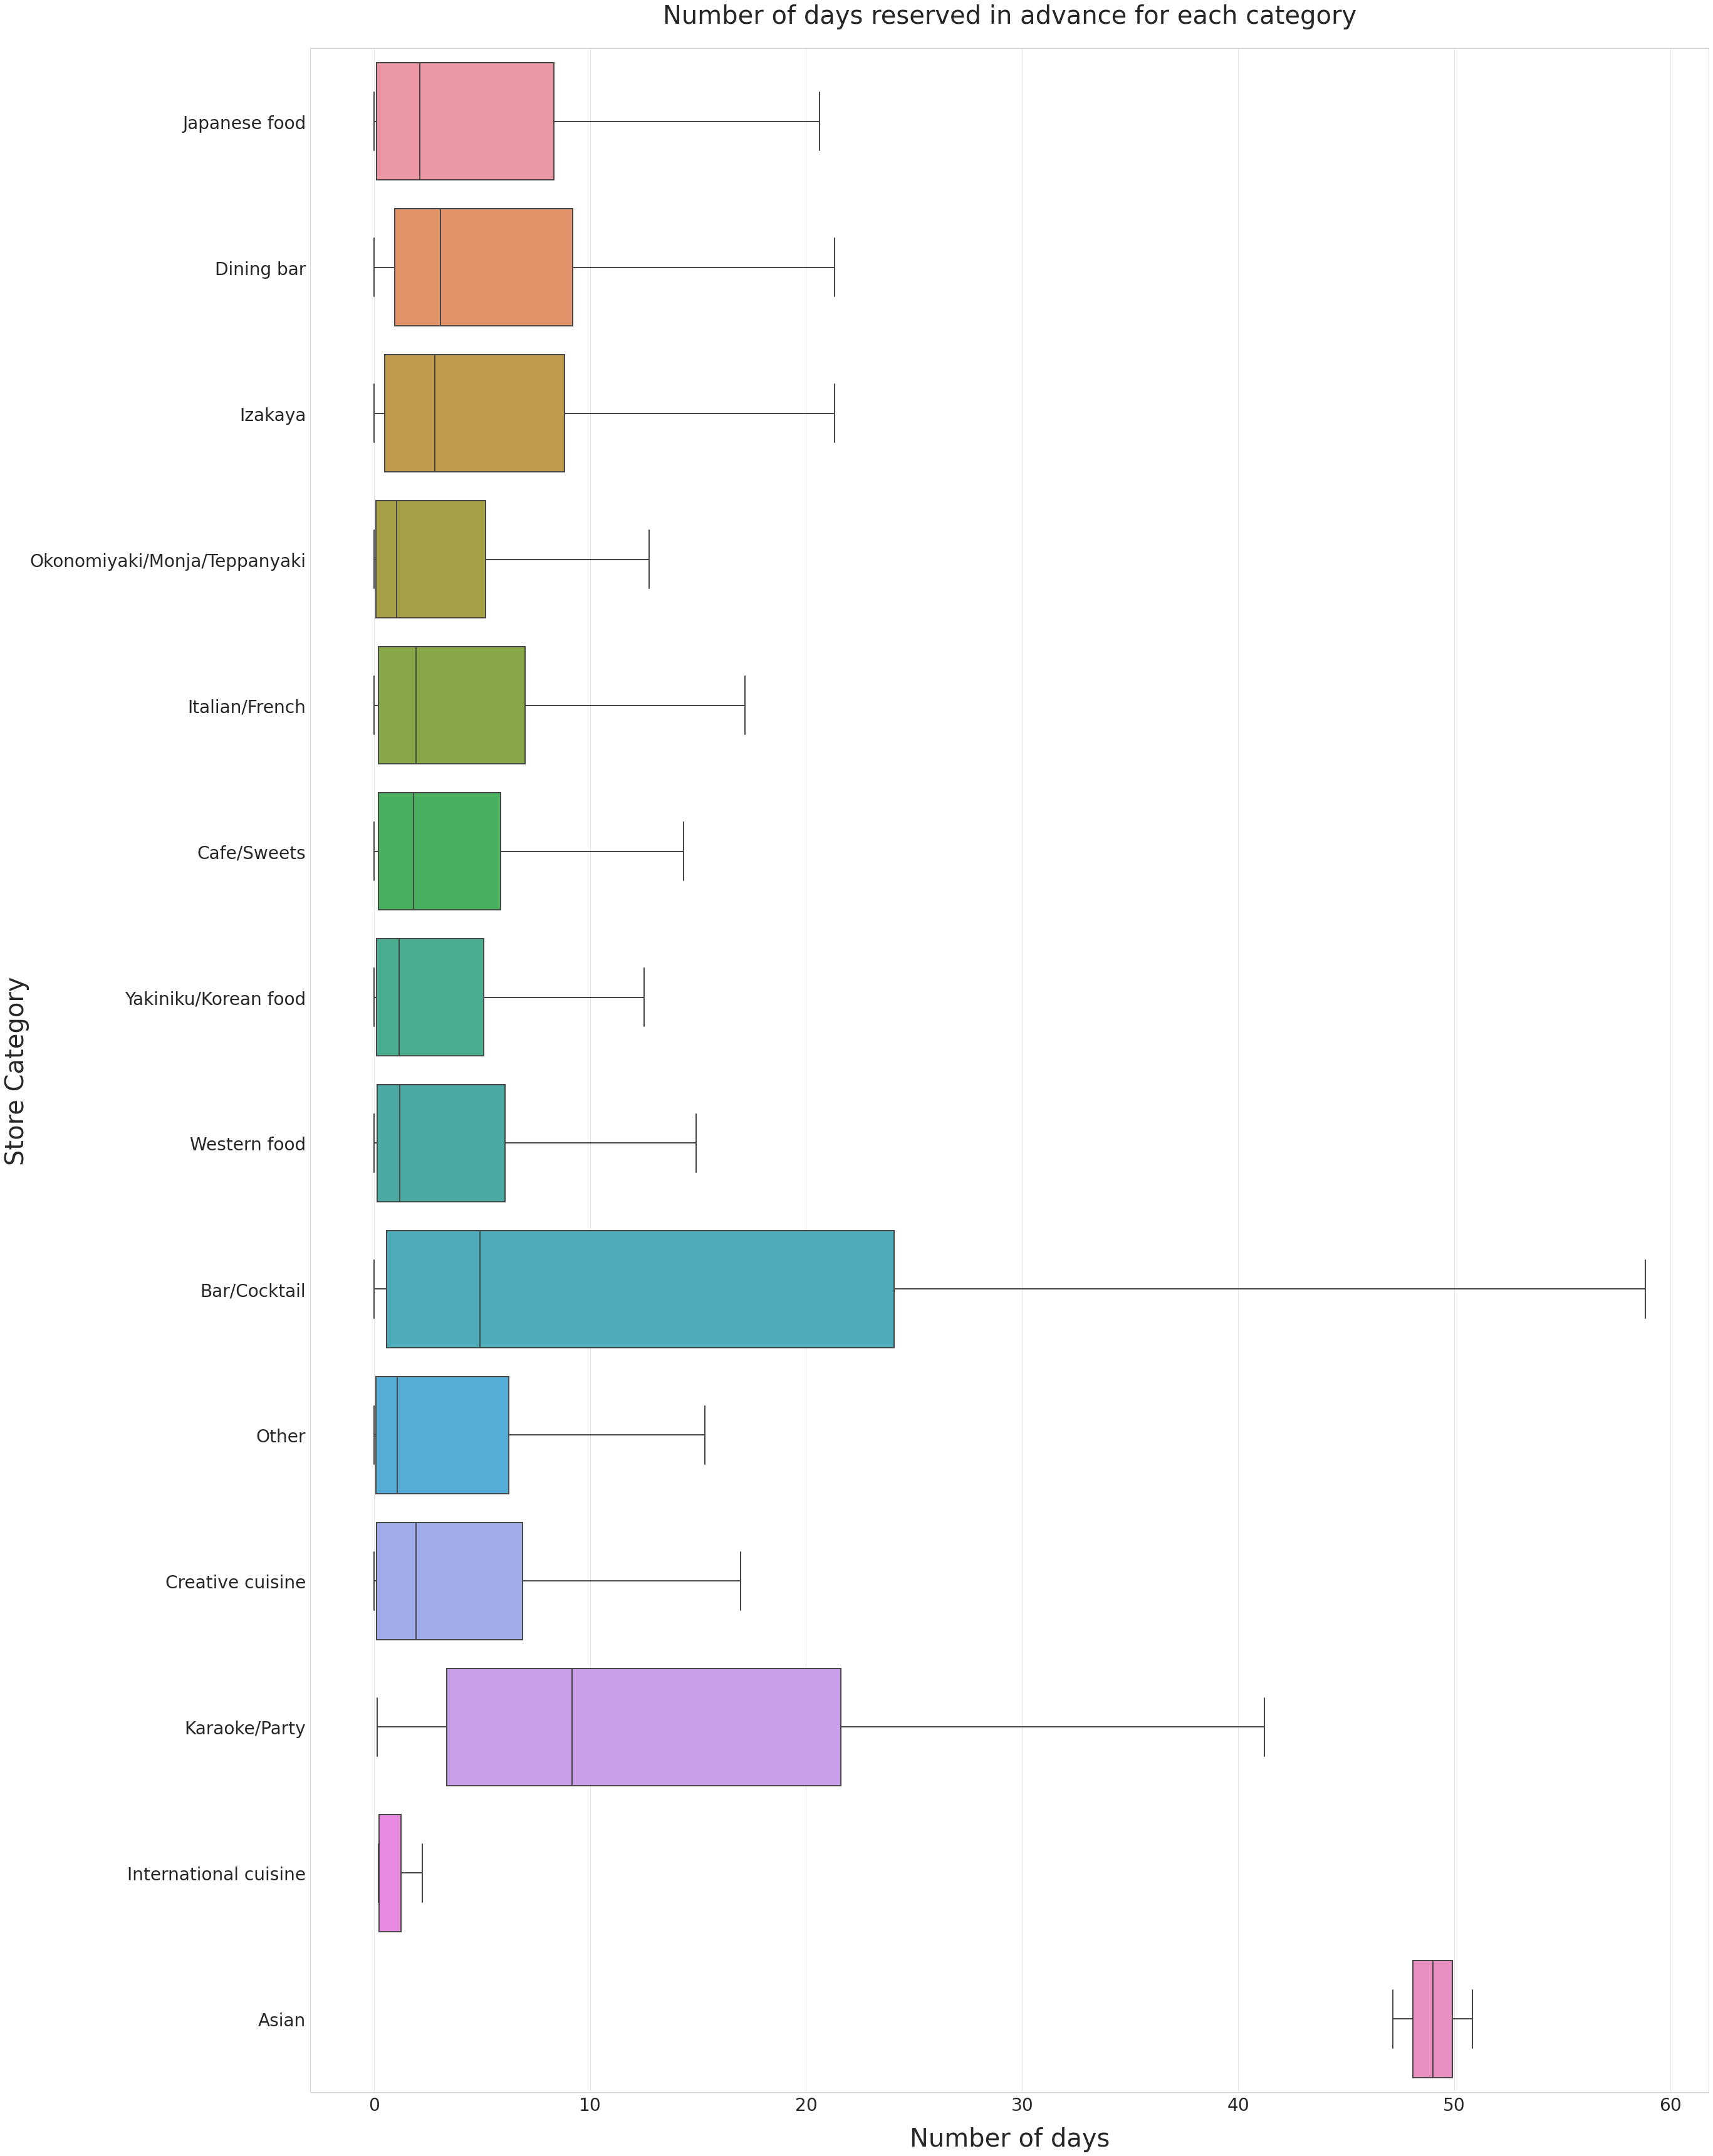

In [8]:
# Plotting the data

fig = plt.figure(figsize = (40,60))
axes = fig.add_subplot(111)

# Using seaborn to plot the boxplot. Note that I have converted the time_difference datetime into 
# the number of days booked in advance by converting the column into an array, finding the total seconds in 
# that datetime and using arithmetic to get the days from seconds

sns.boxplot(x = (air_info_merged['time_difference'].array.total_seconds()/(3600*24)), y = "air_genre_name", data = air_info_merged,showfliers = False)

# Setting up the labels and fontsize of the the x and y axis labels 

axes.set_xlabel('Number of days',fontsize = 40 ,labelpad = 20)
axes.set_ylabel('Store Category',fontsize = 40 ,labelpad = 0)

# Changing the fontsize of the x and y ticklabels 

axes.tick_params(axis='x', labelsize = 28)
axes.tick_params(axis='y', labelsize = 28)

# Setting up the title and fontsize of the the x and y axis labels 

axes.set_title(label='Number of days reserved in advance for each category',
              pad = 40, fontsize = 40)


I have chosen to plot every category as although it leads to a busier boxplot, the categories from task 3 are extremely vague, and through common sense it seemed that from those categories, Asian would be most popular, so I chose to get a boxplot for each of the original categories. It is clear that on average, the asian cuisine is still the most popular. Interestingly however, this excludes Japanese food and Korean food, which implies other asian cuisines (perhaps Chinese or Malaysian) are more popular, if we are basing popularity on the reservation and visit date time difference. Bar and cocktail reservations vary hugely, and you can see that bars and cocktails have been booked the earliest out of all of the genres. Karaoke/Party values follow a similar but less extreme trend, and Izayaka and dining bars are about the same. The least popular seems to be international cuisine restaurants, which is likely because mainly tourists visit these restaurants.